**IMPORT IMPORTANT LIBRARY**


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns


**upload file**


In [4]:
train = pd.read_csv("/content/train hhhhh.csv", low_memory=False)
test = pd.read_csv("/content/test.csv")
store = pd.read_csv("/content/store.csv")
sample_submission = pd.read_csv("/content/sample_submission.csv")


**merging data **


In [5]:
train = train.merge(store, on='Store', how='left')
test = test.merge(store, on='Store', how='left')

In [6]:
train.shape
test.shape

(41088, 17)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [8]:
train.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [9]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [10]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [12]:
train.drop_duplicates()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01-01-2013,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,01-01-2013,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,01-01-2013,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,01-01-2013,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [15]:
test.columns


Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [16]:
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [17]:
test.drop_duplicates()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


**Fill missing values for categorical columns on test data**


In [18]:
train = train[(train["Open"] != 0) & (train["Sales"] > 0)]

In [19]:
train.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


**Correlation matrix on only numerical column**

In [20]:
numeric_df = train.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                              Store  DayOfWeek     Sales  Customers  Open  \
Store                      1.000000   0.000343  0.007723   0.033991   NaN   
DayOfWeek                  0.000343   1.000000 -0.178753  -0.097266   NaN   
Sales                      0.007723  -0.178753  1.000000   0.823552   NaN   
Customers                  0.033991  -0.097266  0.823552   1.000000   NaN   
Open                            NaN        NaN       NaN        NaN   NaN   
Promo                     -0.000015  -0.289268  0.368199   0.182859   NaN   
SchoolHoliday              0.000526  -0.139319  0.038635   0.024915   NaN   
CompetitionDistance       -0.027045   0.005542 -0.036453  -0.148569   NaN   
CompetitionOpenSinceMonth -0.051080   0.000387 -0.043472  -0.044949   NaN   
CompetitionOpenSinceYear  -0.005014   0.001262  0.016102   0.010174   NaN   
Promo2                     0.007728  -0.003252 -0.127556  -0.202207   NaN   
Promo2SinceWeek            0.010686  -0.000581  0.095212   0.061585   NaN   

**heatmap**

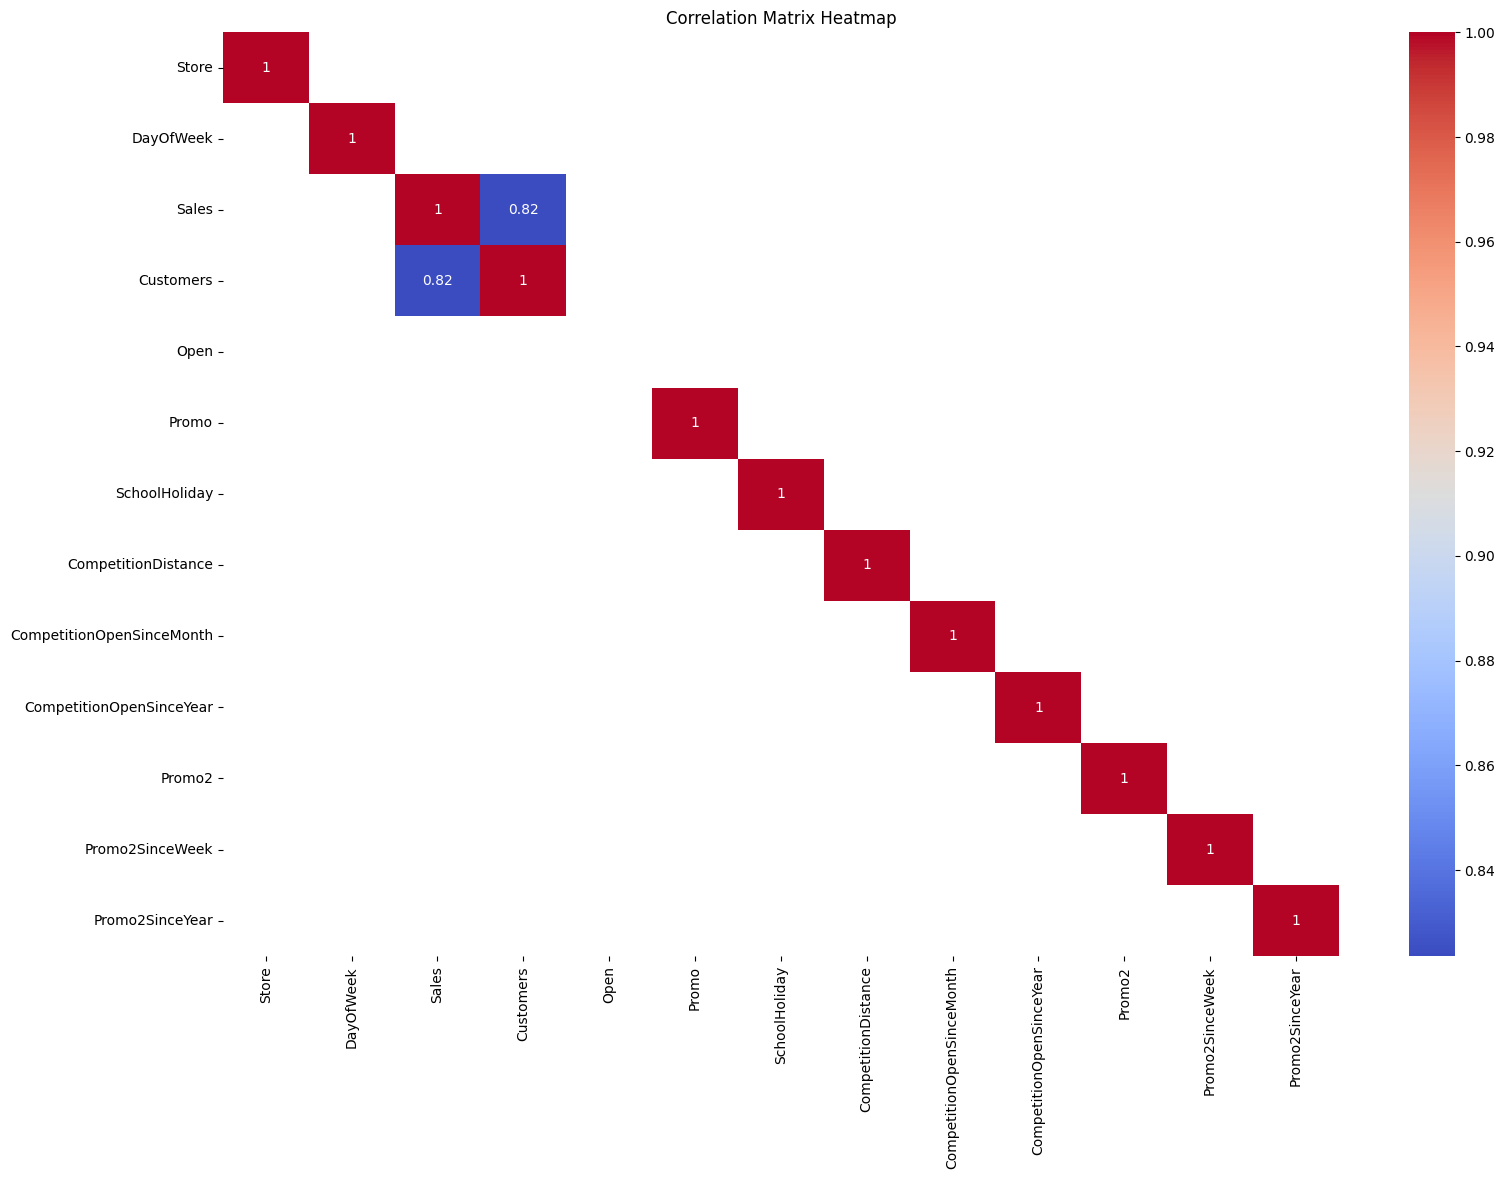

In [21]:
plt.figure(figsize=(18,12))
correlation_matrix = correlation_matrix[correlation_matrix.abs() > 0.8]
sns.heatmap(correlation_matrix,fmt='.2g',cmap="coolwarm",annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
numeric_df = test.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                                 Id         Store     DayOfWeek      Open  \
Id                         1.000000  2.083250e-02  5.483047e-02 -0.049313   
Store                      0.020833  1.000000e+00 -5.032372e-17  0.000818   
DayOfWeek                  0.054830 -5.032372e-17  1.000000e+00 -0.610797   
Open                      -0.049313  8.182058e-04 -6.107974e-01  1.000000   
Promo                     -0.016910 -3.682700e-16 -4.355177e-01  0.332556   
SchoolHoliday              0.387661 -1.175748e-02 -3.529484e-01  0.278293   
CompetitionDistance       -0.001837 -8.856056e-02  1.976116e-16  0.019522   
CompetitionOpenSinceMonth  0.000142  6.743852e-03  2.127855e-16  0.002413   
CompetitionOpenSinceYear   0.000517  2.497608e-02  9.299820e-15  0.004811   
Promo2                     0.000602  2.957459e-02  5.067520e-16 -0.012686   
Promo2SinceWeek            0.000179  8.667273e-03 -5.430647e-17 -0.010518   
Promo2SinceYear            0.001061  5.024529e-02  1.060671e-13  0.001975   

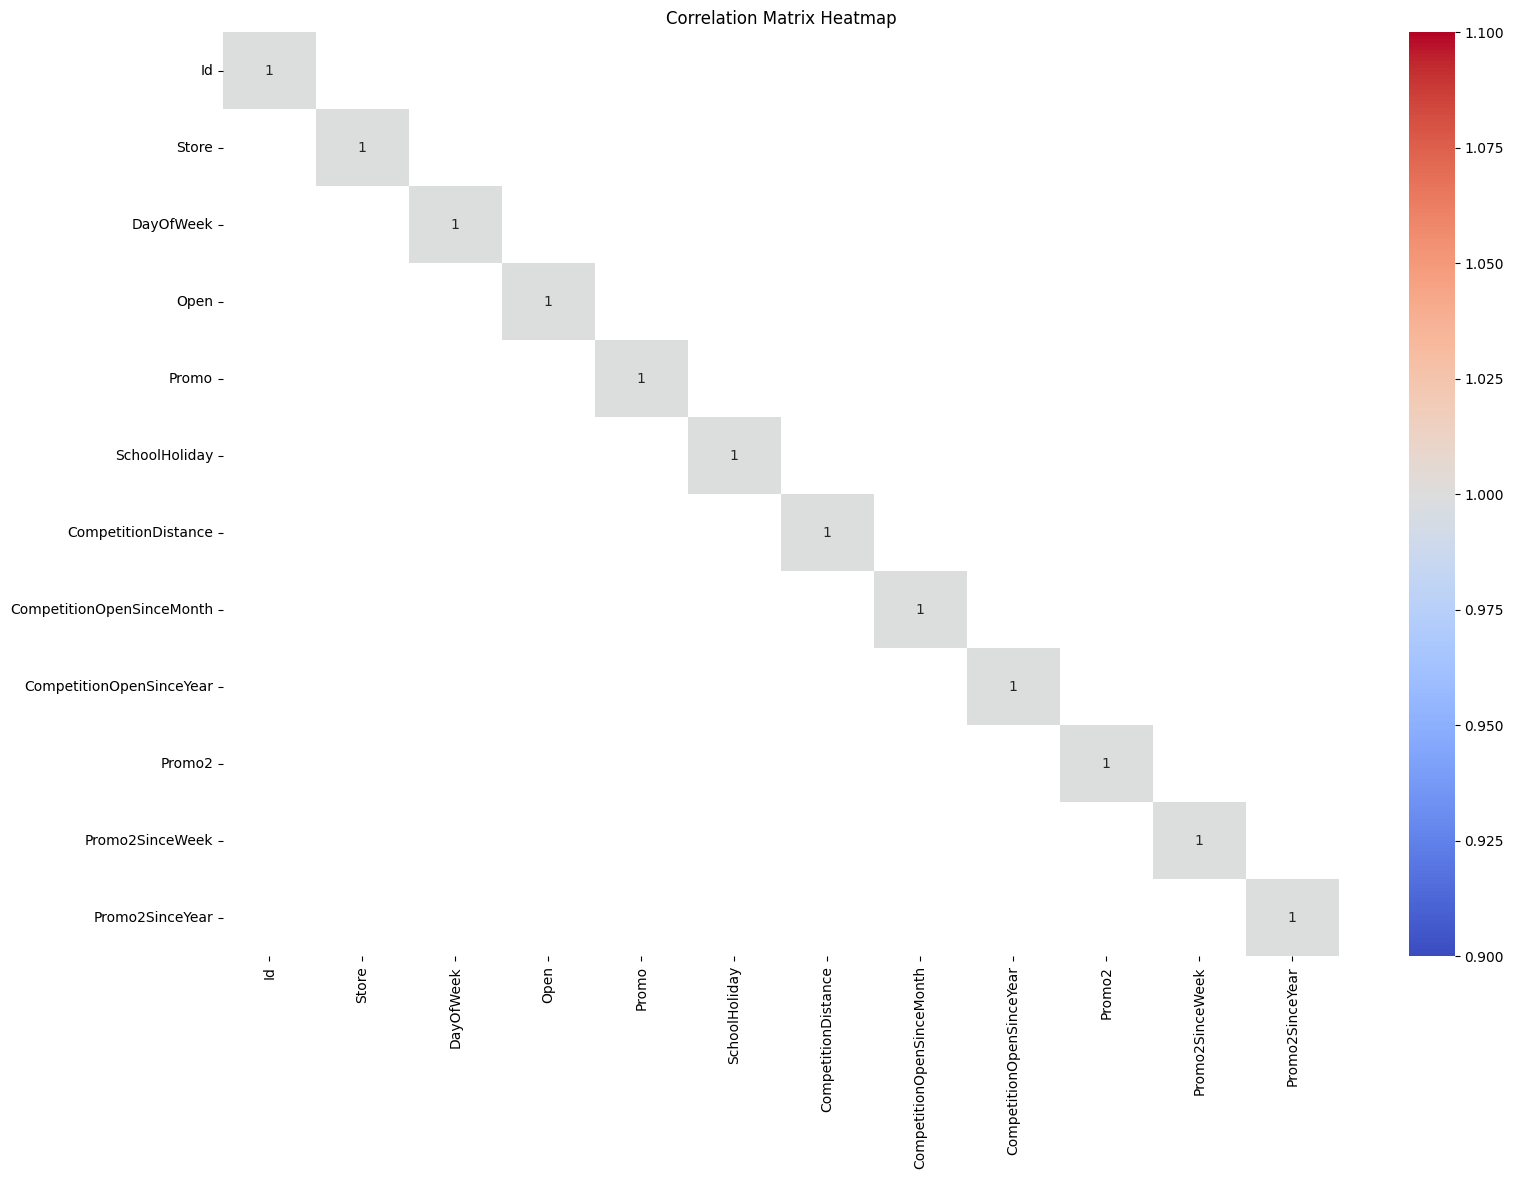

In [23]:
plt.figure(figsize=(18,12))
correlation_matrix = correlation_matrix[correlation_matrix.abs() > 0.8]
sns.heatmap(correlation_matrix,fmt='.2g',cmap="coolwarm",annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**filling missing value**

In [24]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)


**convert dates**

In [25]:
train["Date"] = pd.to_datetime(train["Date"], dayfirst=True)
test["Date"] = pd.to_datetime(test["Date"])


**feature engeneering**

In [26]:
for df in [train, test]:
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day"] = df["Date"].dt.day
    df["WeekOfYear"] = df["Date"].dt.isocalendar().week

**drop date column**

In [27]:
train.drop("Date", axis=1, inplace=True)
test.drop("Date", axis=1, inplace=True)


**ENCODING CATAGORICAL DATA**

In [28]:
cat_cols = ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]
for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))


**SALES DISTRIBUTION**

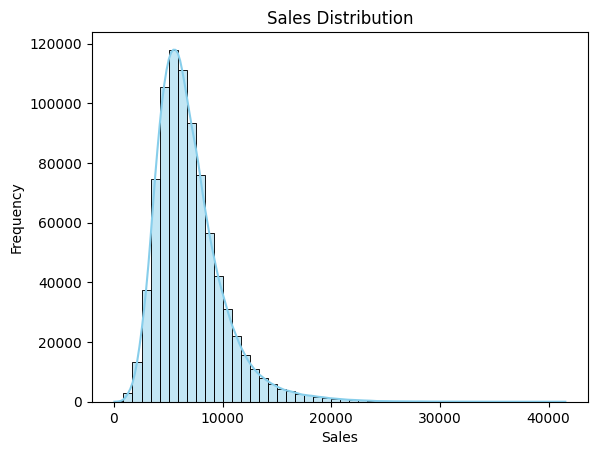

In [29]:
sns.histplot(train["Sales"], bins=50, kde=True, color='skyblue')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

**AVERAGE SALES PER WEEK**

<ipython-input-30-48cd89da2671>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_day.index, y=avg_sales_day.values, palette="viridis")


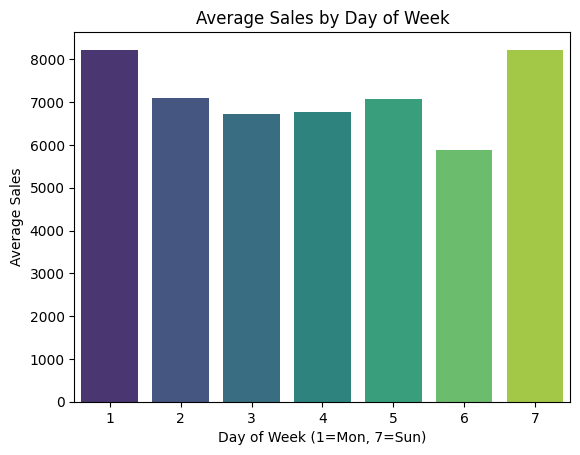

In [30]:
avg_sales_day = train.groupby("DayOfWeek")["Sales"].mean()
sns.barplot(x=avg_sales_day.index, y=avg_sales_day.values, palette="viridis")
plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Average Sales")
plt.show()

**AVERAGE SALE OVER TIME**

**sales over store type**

<ipython-input-31-79a2e2c053e5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x="StoreType", y="Sales", estimator=np.mean, palette="coolwarm")


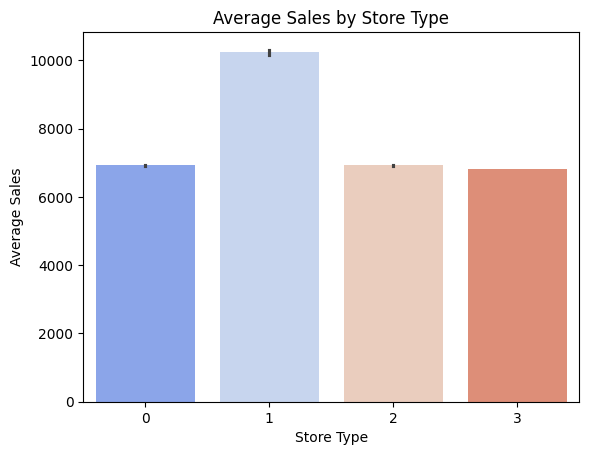

In [31]:
sns.barplot(data=train, x="StoreType", y="Sales", estimator=np.mean, palette="coolwarm")
plt.title("Average Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Average Sales")
plt.show()

**sales by assortment type**

**Impact on promo of sale**

<ipython-input-32-df8947a835cf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x="Promo", y="Sales", palette="Set2")


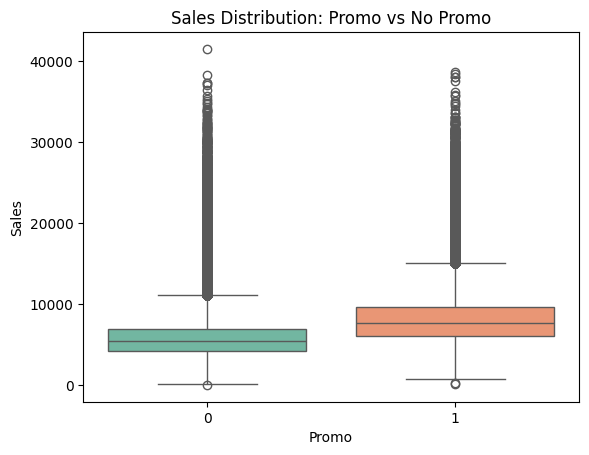

In [32]:
sns.boxplot(data=train, x="Promo", y="Sales", palette="Set2")
plt.title("Sales Distribution: Promo vs No Promo")
plt.xlabel("Promo")
plt.ylabel("Sales")
plt.show()

<ipython-input-33-514b7b4e1b86>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x="Assortment", y="Sales", estimator=np.mean, palette="mako")


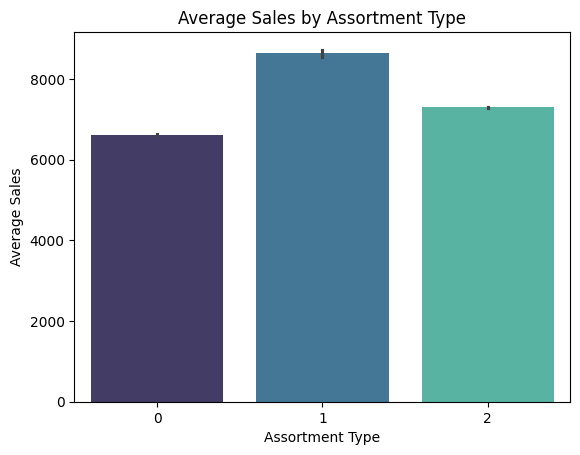

In [33]:
sns.barplot(data=train, x="Assortment", y="Sales", estimator=np.mean, palette="mako")
plt.title("Average Sales by Assortment Type")
plt.xlabel("Assortment Type")
plt.ylabel("Average Sales")
plt.show()

**sales by month**

sales by school holiday

<ipython-input-34-82a814734cfa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x="SchoolHoliday", y="Sales", palette="Pastel1")


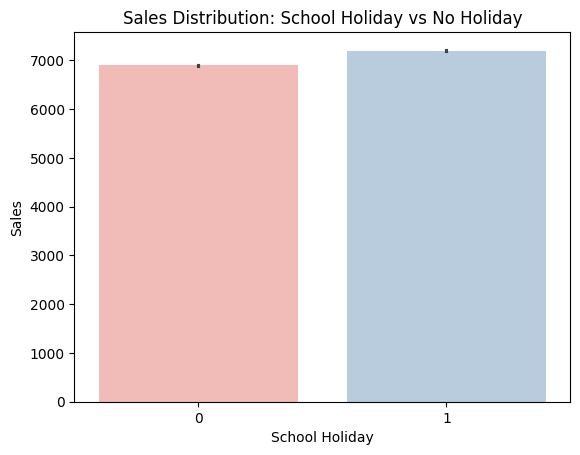

In [34]:
sns.barplot(data=train, x="SchoolHoliday", y="Sales", palette="Pastel1")
plt.title("Sales Distribution: School Holiday vs No Holiday")
plt.xlabel("School Holiday")
plt.ylabel("Sales")
plt.show()

**DEEP LEARNING FEATURE**

In [35]:
X = train.drop(["Sales", "Customers"], axis=1)
y = train["Sales"]


**STANDARD SCALER FEATURE**

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test.drop("Id", axis=1))

**train test split**

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Building deep learning model**

In [38]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**model complisation by using 'ADAM' as optimiser**

In [39]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

**early stoping**

In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


**Train the model**

In [41]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=256, callbacks=[early_stop])


Epoch 1/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 25996736.0000 - mae: 3893.9905 - val_loss: 7530436.0000 - val_mae: 1980.5144
Epoch 2/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 8177028.0000 - mae: 2081.4949 - val_loss: 7379547.5000 - val_mae: 1958.9667
Epoch 3/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 8056472.5000 - mae: 2064.7383 - val_loss: 7328773.5000 - val_mae: 1945.5331
Epoch 4/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 8054592.5000 - mae: 2060.4180 - val_loss: 7302816.5000 - val_mae: 1936.4150
Epoch 5/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 7997413.5000 - mae: 2054.6658 - val_loss: 7256154.0000 - val_mae: 1941.3694
Epoch 6/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 7907826.5000 - mae: 2046.3306 - val_loss: 7234450.5000 - val_mae: 1931.7264
Epoch 7/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 7916591.5000 - mae: 2044.1356 - val_loss: 7215150.0000 - val_mae: 1922.7606
Epoch 8/10
2639/2639 ━━━━━

**predict the model**

In [42]:
predictions = model.predict(X_test_scaled).flatten()


1284/1284 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


**Create submission data frame**

In [43]:
submission = pd.DataFrame({
    "Id": test["Id"],
    "Sales": predictions
})

**save submission as csv file**

In [44]:
submission.to_csv("submission.csv", index=False)
print("✅ Submission saved as submission.csv")

✅ Submission saved as submission.csv


In [45]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=256,
    callbacks=[early_stop]
)

Epoch 1/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 7745006.5000 - mae: 2025.2373 - val_loss: 7062439.0000 - val_mae: 1908.8929
Epoch 2/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 7706890.0000 - mae: 2019.5786 - val_loss: 7029238.5000 - val_mae: 1905.2996
Epoch 3/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 7671977.0000 - mae: 2015.7822 - val_loss: 6995321.0000 - val_mae: 1897.6238
Epoch 4/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 7673005.0000 - mae: 2014.4364 - val_loss: 6960435.5000 - val_mae: 1897.5823
Epoch 5/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 7616623.0000 - mae: 2008.8699 - val_loss: 6937409.5000 - val_mae: 1890.5774
Epoch 6/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 7642350.0000 - mae: 2009.5724 - val_loss: 6916563.5000 - val_mae: 1887.9143
Epoch 7/10
2639/2639 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 7649262.0000 - mae: 2009.8184 - val_loss: 6886585.0000 - val_mae: 1890.1569
Epoch 8/10
2639/2639 ━━━━━━

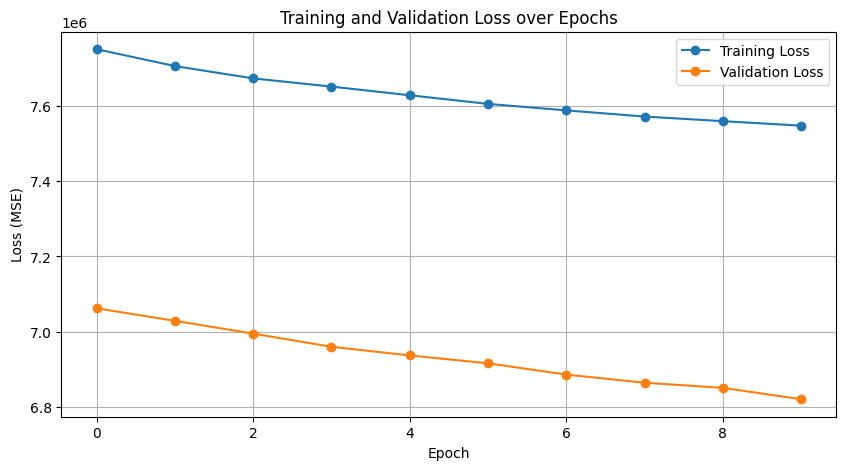

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


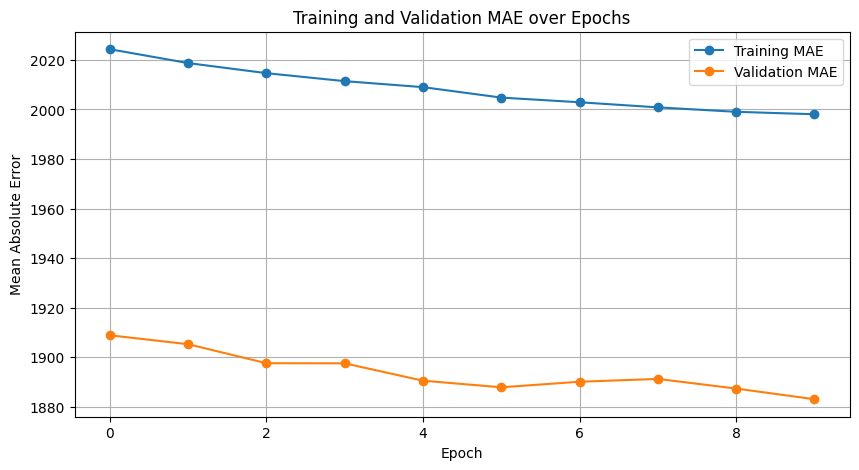

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE', marker='o')
plt.plot(history.history['val_mae'], label='Validation MAE', marker='o')
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
import pickle


In [49]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [50]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)